# House Prices - Advanced Regression Techniques
[Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
df_house = pd.read_csv('../data/train.csv', index_col=0)
df_house_test = pd.read_csv('../data/test.csv', index_col=0)
df_all = pd.concat((df_house.iloc[:, :-1], df_house_test))

In [25]:
y = df_house['SalePrice']

In [28]:
df_house.shape, df_house_test.shape, df_all.shape

((1460, 80), (1459, 79), (2919, 79))

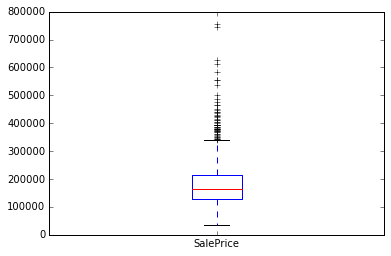

In [14]:
df_house['SalePrice'].plot.box();

In [30]:
df_all_dummy = pd.get_dummies(df_all, drop_first=True)

In [81]:
X = df_all_dummy.iloc[:len(y), :]
X = X.fillna(X.mean().round())

X_test = df_all_dummy.iloc[len(y):, :]
X_test = X_test.fillna(X.mean().round())

# Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [47]:
ridge_reg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
# error on training
np.sqrt(np.mean((np.log(ridge_reg.predict(X)) - np.log(y)) ** 2))

0.12127485227319612

In [72]:
Id = df_all.index.values[len(y):]
y_test = ridge_reg.predict(X_test)

In [78]:
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission1.csv', index=False)

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf = RandomForestRegressor(n_estimators=200)

In [119]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [86]:
# error on training
np.sqrt(np.mean((np.log(rf.predict(X)) - np.log(y)) ** 2))

0.059288301690707514

In [83]:
y_test = rf.predict(X_test)

In [84]:
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission2.csv', index=False)

# Grid Search

In [88]:
from sklearn.grid_search import GridSearchCV

In [ ]:
rf = RandomForestRegressor()

In [105]:
parameters = {'max_features':['auto'], 'n_estimators':[1000], 
             'min_samples_split':[2], 'max_depth': [5, 7, 10, 15] }
clf = GridSearchCV(rf, parameters, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 7, 10, 15], 'n_estimators': [1000], 'min_samples_split': [2], 'max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [106]:
clf.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [117]:
rf.max_depth

In [107]:
y_test = clf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)

In [114]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission3.csv', index_col='Id')
mod4 = pd.read_csv('../data/submissions/submission4.csv', index_col='Id')

In [115]:
df_sub = pd.concat((mod1, mod2, mod3, mod4), axis=1)

# Extremely Random Trees

In [124]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

In [125]:
erf = ExtraTreesRegressor(n_estimators=1000)

In [126]:
erf.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [149]:
# error on training
np.sqrt(np.mean((np.log(erf.predict(X)) - np.log(y)) ** 2))

0.0

In [166]:
y_test = erf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)

In [129]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission3.csv', index_col='Id')
mod4 = pd.read_csv('../data/submissions/submission4.csv', index_col='Id')
df_sub = pd.concat((mod1, mod2, mod3, mod4), axis=1)

In [141]:
df_sub_all = df_sub.mean(axis=1).reset_index()
df_sub_all.columns = ['Id', 'SalePrice']

In [143]:
df_sub_all.to_csv('../data/submissions/submission5.csv', index=False)

# Gradient Boosted Trees

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=500)

In [164]:
gbr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=2, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [165]:
# error on training
np.sqrt(np.mean((np.log(gbr.predict(X)) - np.log(y)) ** 2))

0.080007139065524438

In [167]:
y_test = gbr.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)